# 🩺 Insurance Data EDA

A quick dive into the Insurance dataset to explore how factors like age, BMI, smoking habits, and region affect medical charges.  
We’ll visualize patterns, find correlations, and uncover insights behind healthcare costs. 🚀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\bhavy\\Downloads\\insurance.csv")
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
1293,46,male,25.745,3,no,northwest,9301.89355
100,41,female,31.600,0,no,southwest,6186.12700
507,21,male,23.750,2,no,northwest,3077.09550
251,63,female,32.200,2,yes,southwest,47305.30500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.children = df.children.astype('object')

In [5]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [6]:
df.age.skew(), df.bmi.skew(), df.charges.skew()

(0.05567251565299186, 0.2840471105987448, 1.5158796580240388)

<Axes: xlabel='charges', ylabel='Density'>

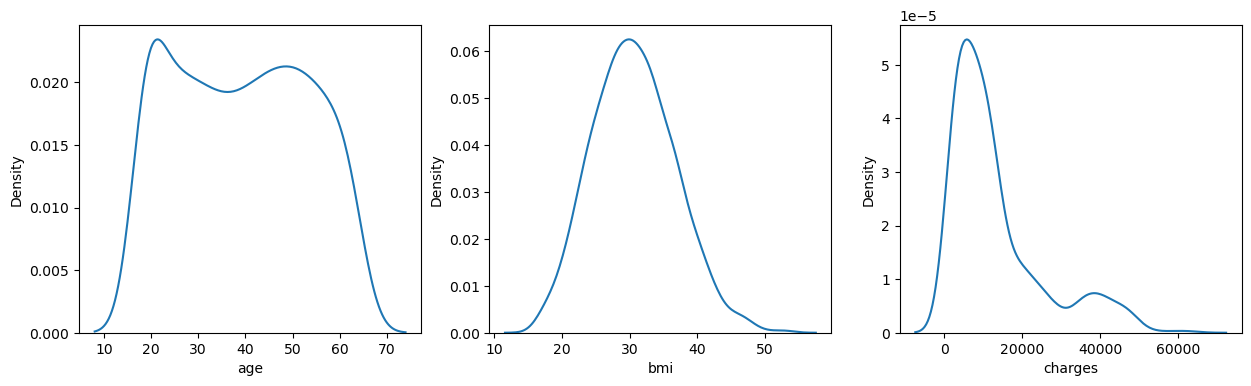

In [7]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.kdeplot(df['age'])

plt.subplot(1,3,2)
sns.kdeplot(df['bmi'])

plt.subplot(1,3,3)
sns.kdeplot(df['charges'])

**Charges are highly skewed, while bmi looks fairly normally distributed**

<Axes: ylabel='charges'>

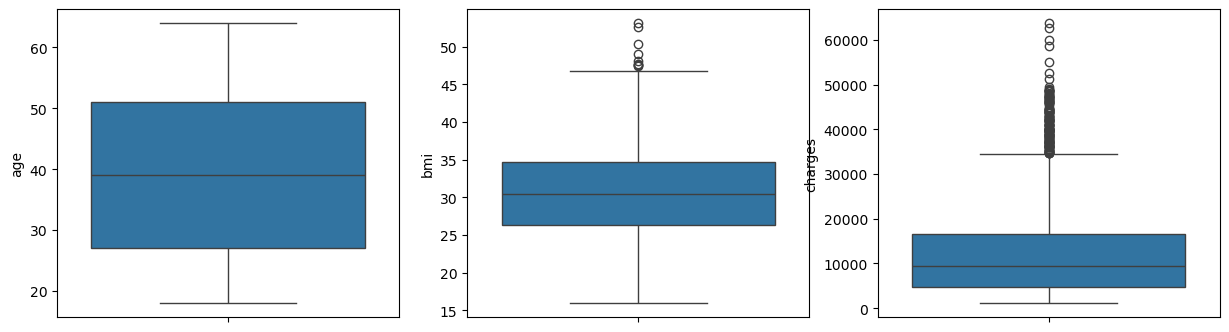

In [8]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(df['age'])

plt.subplot(1,3,2)
sns.boxplot(df['bmi'])

plt.subplot(1,3,3)
sns.boxplot(df['charges'])

In [9]:
data=df

In [10]:
df[df['bmi'] > 46]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
660,37,male,46.53,3,no,southeast,6435.62370
847,23,male,50.38,1,no,southeast,2438.05520


To check if the outliers are a manual error (like typing error) or actual real values.

All were found to be fairly real values

In [11]:
charges_outliers = df[df['charges']>34000]

In [12]:
charges_outliers.sort_values('charges',ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
1001,24,male,32.700,0,yes,southwest,34472.84100
618,19,female,33.110,0,yes,southeast,34439.85590
57,18,male,31.680,2,yes,southeast,34303.16720
1267,24,male,31.065,0,yes,northeast,34254.05335


<Axes: xlabel='charges', ylabel='Count'>

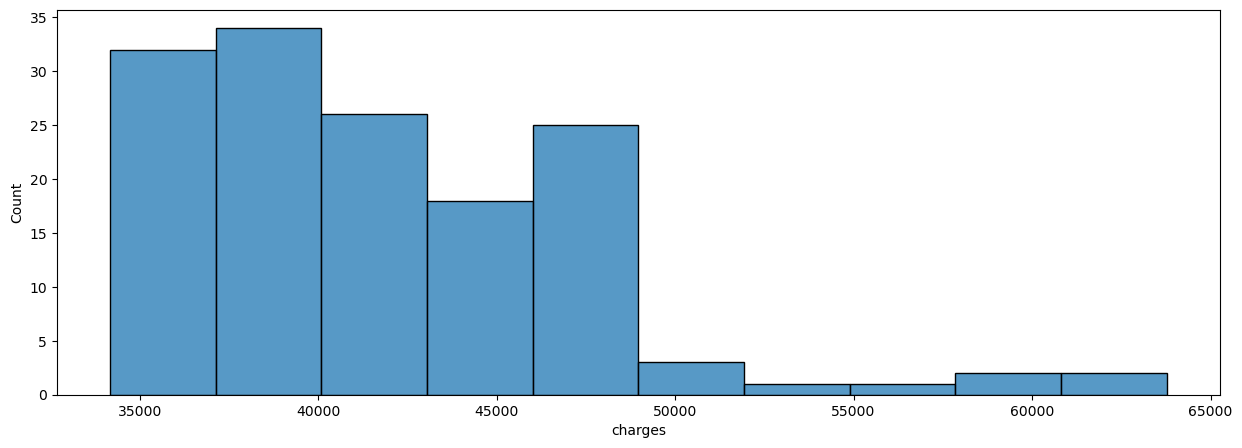

In [13]:
plt.figure(figsize=(15,5))

sns.histplot(charges_outliers.charges)

In [14]:
df.describe(include='object')

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


<Axes: xlabel='age', ylabel='count'>

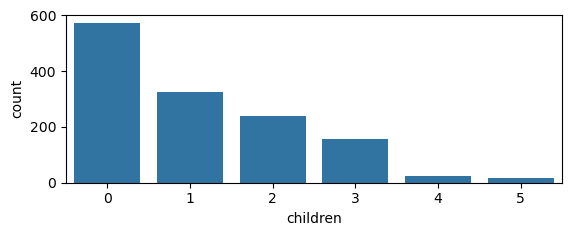

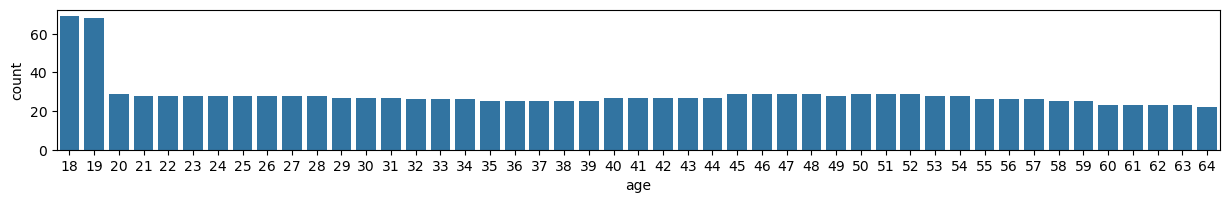

In [15]:
plt.subplot(2,1,1)
sns.countplot(x='children', data=df)

plt.figure(figsize=(15,4))
plt.subplot(2,1,2)
sns.countplot(x='age',data=df)

Age groups can be (18-19) teens (also since they are the ones with higher counts) , 20-29 (young adults) , 30-39 (uncs) , 40-49 (middle aged), 50-64 (seniors)

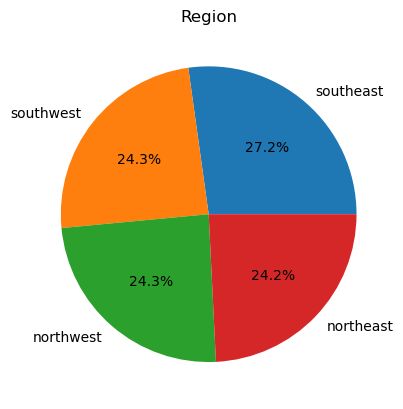

In [16]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')  # remove y-label
plt.title('Region')
plt.show()

**EDA related to Age**

Grouping ages 

1) Trend of age counts to see which age group has higher count
2) Age links to BMI, 3rd variable can be sex,smoker or not, region
3) Age and Charges relation (do charges increase in general as you age?) (can check avg charges and total charges by age)  (can also check anomalies)

In [17]:
data = df

In [18]:
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [19]:
bins = [17, 19, 29, 39, 49, 64]  # edges for bins
labels = ['Teens', 'Young adults', 'Uncs', 'Middle aged', 'Seniors']

data['Age group'] = pd.cut(data['age'], bins=bins, labels=labels)

data['child'] = np.where(data['children'] > 0, 'Has child', 'No child')

bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

data['BMI_category'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=True)

In [20]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age group', 'child', 'BMI_category'],
      dtype='object')

In [21]:
data = data[['age','Age group' ,'sex', 'bmi', 'BMI_category','children', 'child','smoker', 'region', 'charges']]
data.sample(2)

,age,Age group,sex,bmi,BMI_category,children,child,smoker,region,charges
600,18,Teens,female,39.16,Obese,0,No child,0,southeast,1633.0444
1051,64,Seniors,male,26.41,Overweight,0,No child,0,northeast,14394.5579


1) Age count trend

<Axes: xlabel='Age group', ylabel='count'>

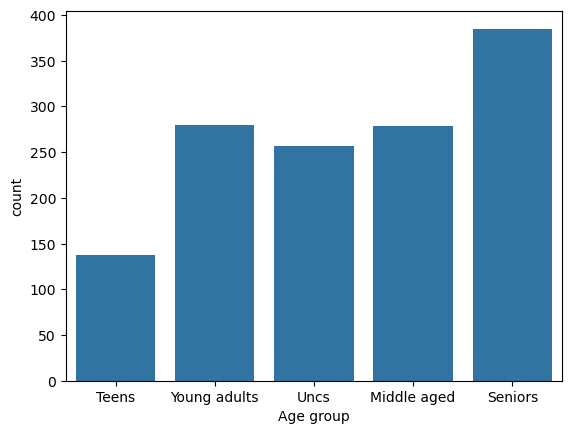

In [22]:
sns.countplot(x=data['Age group'])

2) BMI relation to Age

In [23]:
df[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [24]:
data.sample(4)

,age,Age group,sex,bmi,BMI_category,children,child,smoker,region,charges
1158,20,Young adults,female,30.590,Obese,0,No child,0,northeast,2459.72010
44,38,Uncs,male,37.050,Obese,1,Has child,0,northeast,6079.67150
1050,44,Middle aged,female,36.955,Obese,1,Has child,0,northwest,8023.13545
698,56,Seniors,male,33.725,Obese,0,No child,0,northwest,10976.24575


<Axes: xlabel='age', ylabel='bmi'>

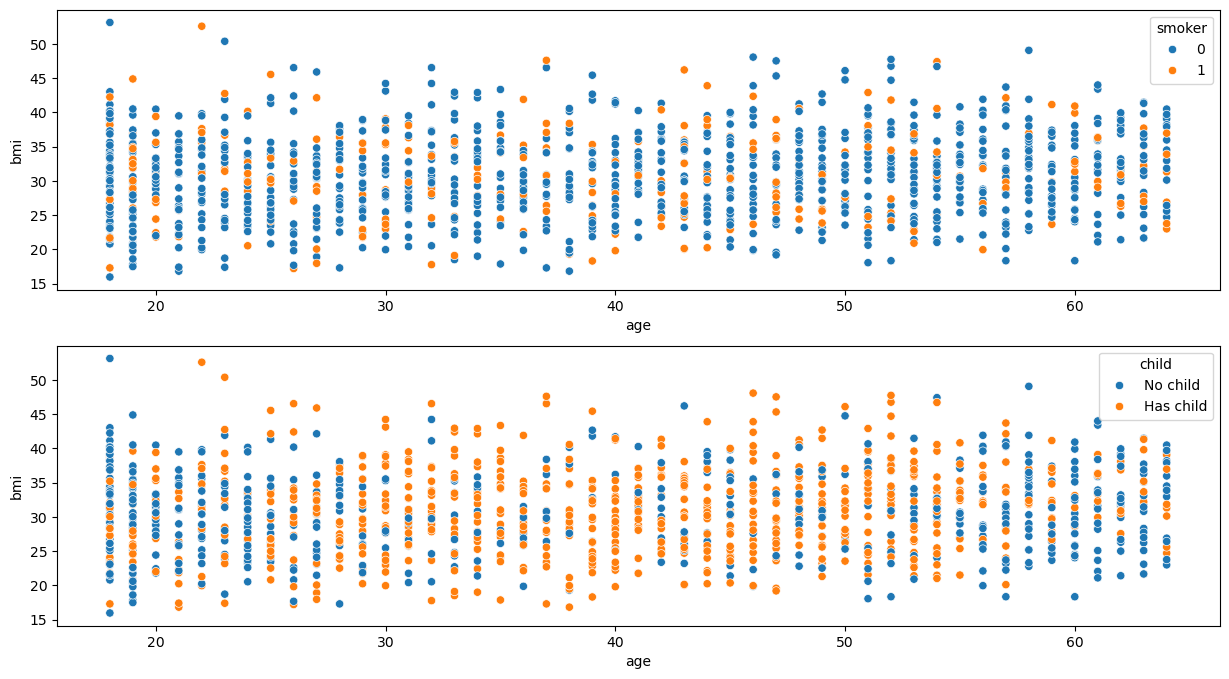

In [25]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.scatterplot(x='age',y='bmi',hue='smoker',data=data)

plt.subplot(2,1,2)
sns.scatterplot(x='age',y='bmi',hue='child',data=data)

There was no relation found between BMI and Age

3) Age and Charges

Age and charge has a correlation of 0.3 . We'll check this correlation using scatterplot

In [26]:
data.sample()

,age,Age group,sex,bmi,BMI_category,children,child,smoker,region,charges
286,46,Middle aged,female,48.07,Obese,2,Has child,0,northeast,9432.9253


In [27]:
data['smoker'] = data['smoker'].astype('category')

In [28]:
data.bmi.max() , data.bmi.min()

(53.13, 15.96)

In [29]:
data.sample()

,age,Age group,sex,bmi,BMI_category,children,child,smoker,region,charges
1216,40,Middle aged,male,25.08,Overweight,0,No child,0,southeast,5415.6612


<Axes: xlabel='age', ylabel='charges'>

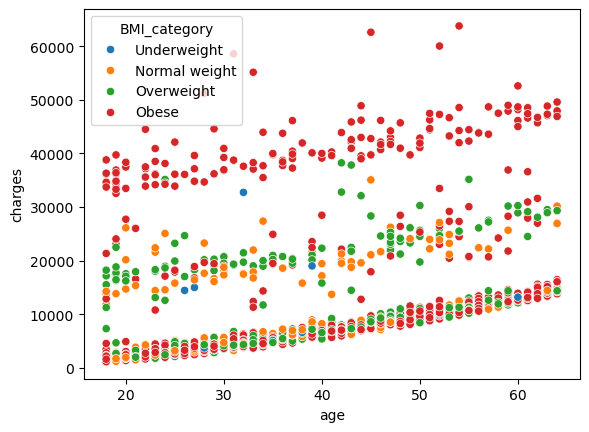

In [30]:
sns.scatterplot(x='age',y='charges',hue='BMI_category',data=data)

<Axes: xlabel='age', ylabel='charges'>

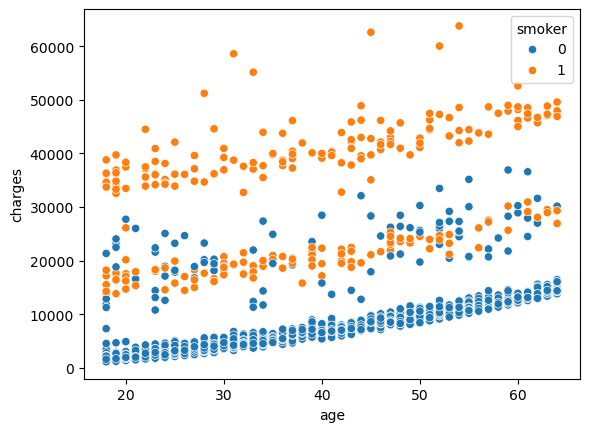

In [31]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=data)

It can be clearly seen that smoking status and high BMI have a significant relation with charges.

Its also seen that charges do increase as you age (not strong, but a small correlation)

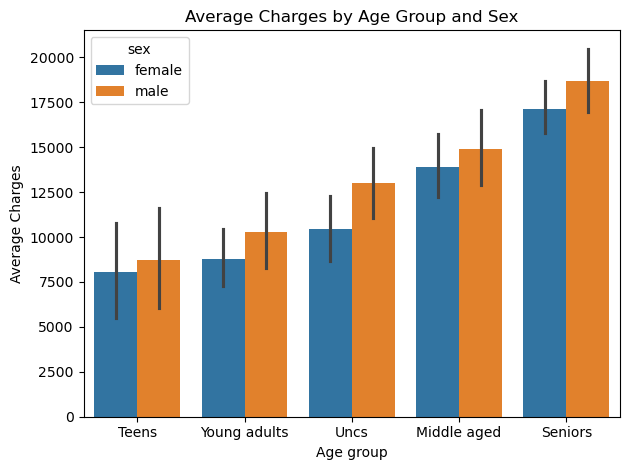

In [61]:
# --- Average charges ---
sns.barplot(
    data=data,
    x="Age group",
    y="charges",
    hue="sex",
    estimator="mean"   # average charges
)
plt.ylabel("Average Charges")
plt.title("Average Charges by Age Group and Sex")

plt.tight_layout()
plt.show()


It can be seen that charges are higher as you age and average charges are higher for males in all age groups

<Axes: xlabel='charges', ylabel='Age group'>

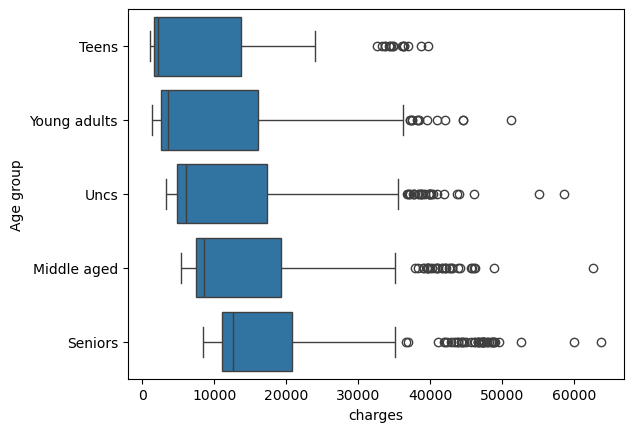

In [34]:
sns.boxplot(x='charges', y = 'Age group', data=data)

Charge outliers in teens is approximately >25000, while for the rest of the categories it is roughly >36000

And you'll also notice that minimum cost is gradually increasing with age

**EDA related to Gender**

In [35]:
data.sample()

,age,Age group,sex,bmi,BMI_category,children,child,smoker,region,charges
830,63,Seniors,male,33.1,Obese,0,No child,0,southwest,13393.756


BMI_category
Obese            716
Overweight       380
Normal weight    221
Underweight       21
Name: count, dtype: int64


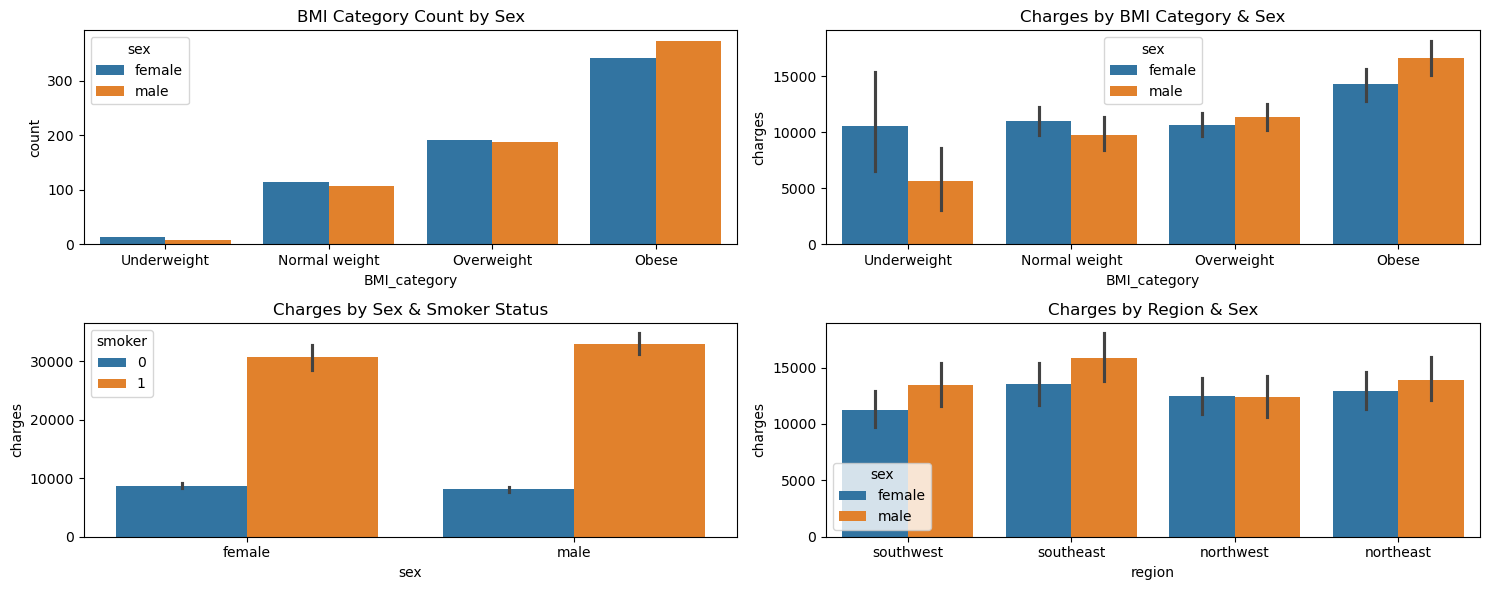

In [36]:
print(data['BMI_category'].value_counts())

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)  # 2 rows, 2 cols, plot 1
sns.countplot(x='BMI_category', hue='sex', data=data)
plt.title("BMI Category Count by Sex")

plt.subplot(2, 2, 2)  # plot 2
sns.barplot(x='BMI_category', y='charges', hue='sex', data=data)
plt.title("Charges by BMI Category & Sex")

plt.subplot(2, 2, 3)  # plot 3
sns.barplot(x='sex', y='charges', hue='smoker', data=data)
plt.title("Charges by Sex & Smoker Status")

plt.subplot(2, 2, 4)  # plot 4
sns.barplot(x='region', y='charges', hue='sex', data=data)
plt.title("Charges by Region & Sex")

plt.tight_layout()
plt.show()


Majority of people are either overweight or Obese (as seen in the 1st figure)

Charges increase (and its a drastic difference) if you are a smoker (seen in 3rd figure)

2nd and 4th don't provide much insight

**EDA related to BMI**

children
0    30.361522
1    30.052658
2    30.649790
3    30.436429
4    31.943182
5    30.620625
Name: bmi, dtype: float64
child
Has child    30.390322
No child     30.361522
Name: bmi, dtype: float64
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


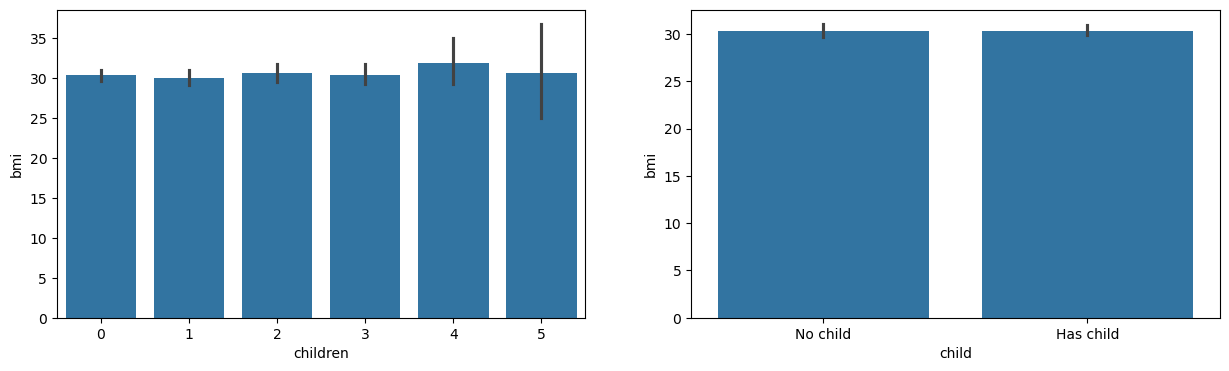

In [54]:
# Does higher number of children cause high BMI in females??

print(data[data['sex']=='female'].groupby('children')['bmi'].mean())
print(data[data['sex']=='female'].groupby('child')['bmi'].mean())

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
print(sns.barplot(data=data[data['sex']=='female'],x='children',y='bmi'))
plt.subplot(1,2,2)
print(sns.barplot(data=data[data['sex']=='female'],x='child',y='bmi'))

In [38]:
data['children']=data['children'].astype('int')

In [40]:
import statsmodels.api as sm

In [41]:
# Checking the hypothesis that BMI is affected by number of children

x = data[data['sex']=='female'][['children']]
X = sm.add_constant(x)
y = data[data['sex']=='female']["bmi"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3240
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.569
Time:                        14:33:59   Log-Likelihood:                -2129.9
No. Observations:                 662   AIC:                             4264.
Df Residuals:                     660   BIC:                             4273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2571      0.317     95.582      0.0

P value of 0.569 shows that BMI is unaffected by number of children and is highly insignificant to BMI

Ans : No

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64


<Axes: xlabel='region', ylabel='count'>

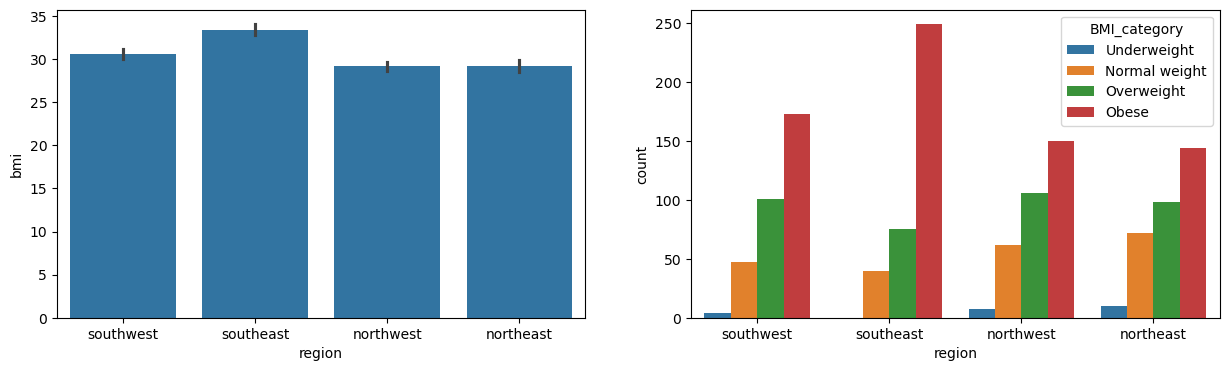

In [56]:
# People of which region have a higher BMI

print(data.groupby('region')['bmi'].mean())
print(data.groupby('region')['region'].count())
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='region',y='bmi',data=data)
plt.subplot(1,2,2)
sns.countplot(x='region',hue='BMI_category',data=data)

People from southeast have on average a higher BMI

<Axes: xlabel='bmi', ylabel='charges'>

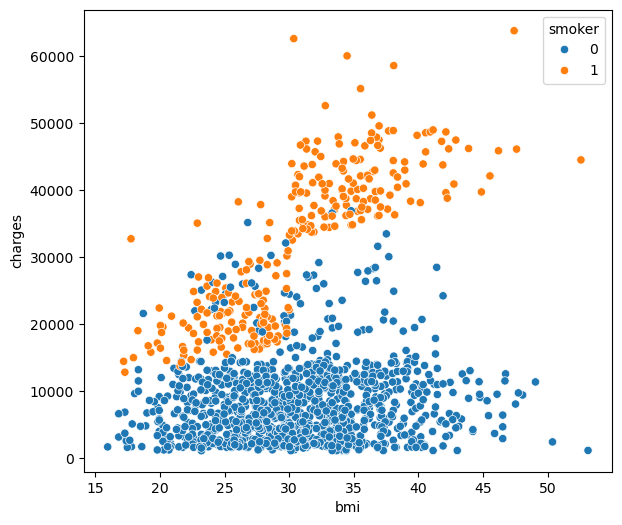

In [57]:
# Does higher BMI correlates to higher charges? (Can use hues like smoker)
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=data)

Another graph showing that Smoking highly affects charges

**Which group has higher charges? Smokers with high BMI or Low BMI??**

BMI_category
Underweight      18809.824980
Normal weight    19942.223641
Overweight       22379.034063
Obese            41355.869131
Name: charges, dtype: float64


C:\Users\bhavy\AppData\Local\Temp\ipykernel_2472\2924119805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data[data['smoker']==1].groupby('BMI_category')['charges'].mean())


<Axes: xlabel='BMI_category', ylabel='charges'>

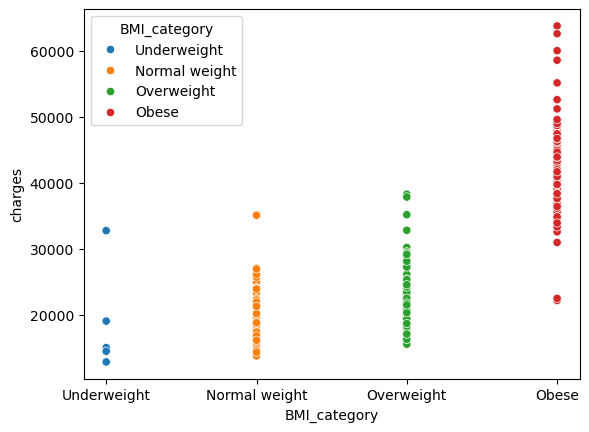

In [46]:
print(data[data['smoker']==1].groupby('BMI_category')['charges'].mean())

sns.scatterplot(x='BMI_category',y='charges',data=data[data['smoker']==1],hue='BMI_category')

Charges do increase with higher BMI, as seen here

**Charges for females with and without children**

In [48]:
print(data[data['sex']=='female'].groupby('child')['charges'].mean())

child
Has child    13083.940399
No child     11905.714276
Name: charges, dtype: float64


<Axes: xlabel='children', ylabel='charges'>

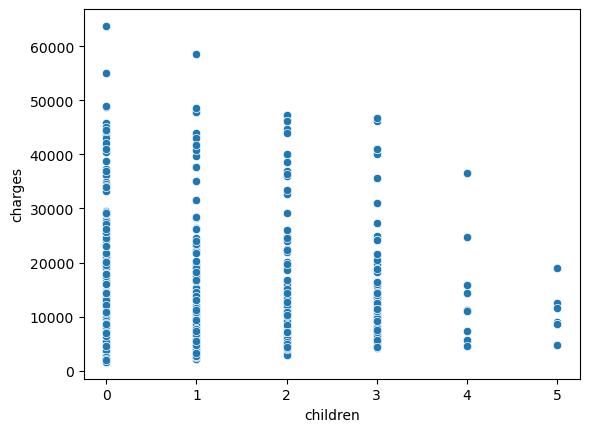

In [49]:
sns.scatterplot(x='children',y='charges',data=data[data['sex']=='female'])

In [50]:
# Checking the hypothesis that charges for female are affected by number of children

x = data[data['sex']=='female'][['children']]
X = sm.add_constant(x)
y = data[data['sex']=='female']["charges"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.266
Date:                Thu, 23 Oct 2025   Prob (F-statistic):              0.133
Time:                        14:34:03   Log-Likelihood:                -7105.7
No. Observations:                 662   AIC:                         1.422e+04
Df Residuals:                     660   BIC:                         1.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.198e+04    581.820     20.596      0.0

P value of 0.1 proves that it is insignificant

Answer:- No relation between charges and children

**Which region has higher number of smokers**

Text(0, 0.5, 'smokers')

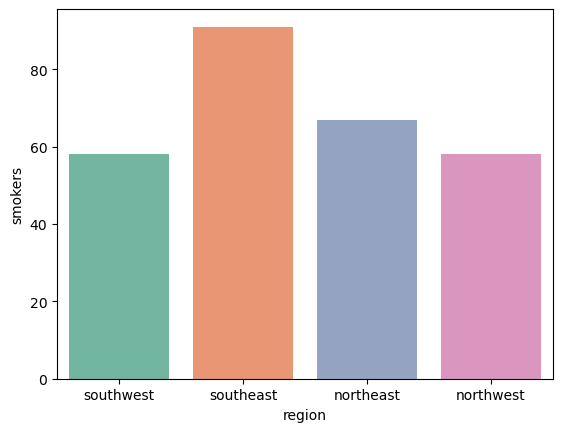

In [51]:
sns.countplot(x='region',data=data[data['smoker']==1],hue='region',palette='Set2')
plt.ylabel('smokers')

<Axes: xlabel='region', ylabel='charges'>

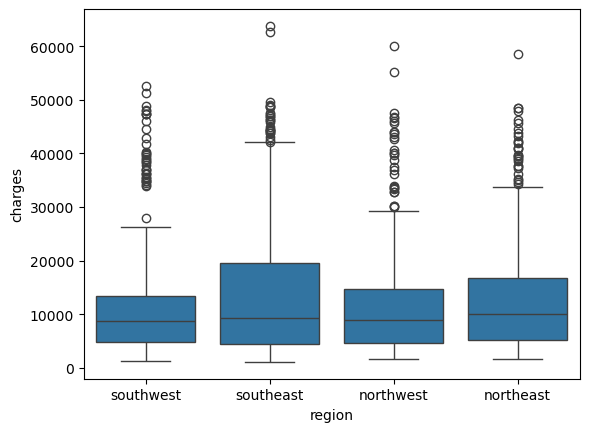

In [53]:
sns.boxplot(x='region', y='charges', data=df)